In [146]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import bs4 as bs
import requests
%matplotlib inline

In [147]:
# reading all sheets won't help as those have different formats. 
# sheets = pd.read_excel("./Portfolio-Theory-Investment-Data-Monthly.xlsx",sheetname=["SPY","IWM","VWO","EFA","LQD","HYG","US Treasury Yields"],)
# Read each data set individually
#spy = pd.read_excel("./Portfolio-Theory-Investment-Data-Monthly.xlsx",sheetname=["SPY"],header=3)
sheets = pd.read_excel("./Portfolio-Theory-Investment-Data-Monthly.xlsx",sheetname=["SPY","IWM","VWO","EFA","LQD","HYG"],header=3)
spyds= sheets['SPY']
spyds= spyds.iloc[:102,:9]
spyds=spyds.set_index('Date')
spyds.head()

,Open,High,Low,Close,Volume,Adj Close,Monthly Return,Excess Return
Date,,,,,,,,
2010-01-04,112.37,115.14,107.22,107.39,211378900.0,107.39,-0.036342,-0.036642
2009-12-01,110.92,113.03,109.02,111.44,135205600.0,111.44,0.019113,0.018313
2009-11-02,104.13,111.74,103.08,109.94,179587000.0,109.35,0.061547,0.061147
2009-10-01,103.00,110.31,101.99,103.56,218514000.0,103.01,-0.019139,-0.019439
2009-09-01,101.95,108.06,99.57,105.59,192016100.0,105.02,0.035394,0.034294


In [148]:
iwmds=sheets['IWM']
iwmds=iwmds.iloc[:,:9]
iwmds=iwmds.set_index('Date')
iwmds.head()

,Open,High,Low,Close,Volume,Adj Close,Monthly Return,Excess Return
Date,,,,,,,,
2010-01-04,63.29,64.88,59.97,60.11,65659700,60.11,-0.037316,-0.037616
2009-12-01,58.64,63.61,58.46,62.44,53433700,62.44,0.079157,0.078357
2009-11-02,56.63,60.68,55.33,58.09,66242700,57.86,0.031373,0.030973
2009-10-01,60.13,62.52,55.98,56.33,60684200,56.10,-0.065000,-0.065300
2009-09-01,56.86,62.61,55.21,60.24,49936500,60.00,0.055780,0.054680


In [149]:
#VWO","EFA","LQD","HYG"
vwods=sheets['VWO']
vwods=vwods.iloc[:,:9]
vwods=vwods.set_index('Date')
vwods.head()

,Open,High,Low,Close,Volume,Adj Close,Monthly Return,Excess Return
Date,,,,,,,,
2010-01-04,41.76,42.97,38.07,38.24,12988000,38.24,-0.067317,-0.067617
2009-12-01,41.07,42.17,39.76,41.00,10893900,41.00,0.031187,0.030387
2009-11-02,38.10,41.98,37.40,40.30,11073700,39.76,0.071698,0.071298
2009-10-01,38.52,41.43,37.04,37.60,10833300,37.10,-0.023941,-0.024241
2009-09-01,35.10,39.12,34.40,38.53,8428600,38.01,0.099508,0.098408


In [150]:
#VWO","EFA","LQD","HYG"
efads=sheets['EFA']
efads=efads.iloc[:,:9]
efads=efads.set_index('Date')
efads.head()

,Open,High,Low,Close,Volume,Adj Close,Monthly Return,Excess Return
Date,,,,,,,,
2010-01-04,56.42,58.00,52.33,52.48,20735700,52.48,-0.050651,-0.050951
2009-12-01,56.47,57.66,54.23,55.28,15940700,55.28,0.007105,0.006305
2009-11-02,53.77,57.61,52.78,55.39,19084100,54.89,0.039190,0.038790
2009-10-01,54.34,57.46,52.42,53.30,20099100,52.82,-0.025281,-0.025581
2009-09-01,52.14,56.31,50.07,54.68,21049600,54.19,0.038123,0.037023


In [151]:
#VWO","EFA","LQD","HYG"
lqdds=sheets['LQD']
lqdds=lqdds.iloc[:,:9]
lqdds=lqdds.set_index('Date')
lqdds.head()

,Open,High,Low,Close,Volume,Adj Close,Monthly Return,Excess Return
Date,,,,,,,,
2010-01-04,104.77,106.27,104.34,105.45,1163600,105.00,0.012536,0.012236
2009-12-01,106.58,106.72,103.77,104.15,1031100,103.70,-0.020682,-0.021482
2009-11-02,105.33,107.25,104.37,107.25,813100,105.89,0.019546,0.019146
2009-10-01,106.15,106.22,103.58,105.68,1252900,103.86,-0.004982,-0.005282
2009-09-01,104.51,107.19,104.04,106.68,981200,104.38,0.012808,0.011708


In [152]:
#VWO","EFA","LQD","HYG"
hygds=sheets['HYG']
hygds=hygds.iloc[:,:9]
hygds=hygds.set_index('Date')
hygds.head()

,Open,High,Low,Close,Volume,Adj Close,Monthly Return,Excess Return
Date,,,,,,,,
2010-01-04,88.00,90.29,86.22,86.23,972000,85.57,-0.018242,-0.018542
2009-12-01,85.59,88.80,85.35,87.84,496200,87.16,0.036755,0.035955
2009-11-02,84.93,86.65,84.59,85.90,611800,84.07,0.016935,0.016535
2009-10-01,85.36,87.20,82.00,85.18,963200,82.67,-0.005534,-0.005834
2009-09-01,81.68,86.69,80.10,86.35,751300,83.13,0.058037,0.056937


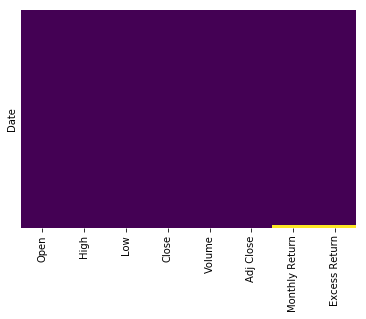

In [153]:
#Heatmap to display null values for SPY(same for others as well)
sns.heatmap(spyds.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [154]:
spyds.iloc[-3:]

,Open,High,Low,Close,Volume,Adj Close,Monthly Return,Excess Return
Date,,,,,,,,
2001-10-01,103.90,111.79,102.83,105.80,23510200.0,91.42,0.012964,-0.010836
2001-09-04,113.85,116.17,93.80,104.44,29389500.0,90.25,-0.081612,-0.116812
2001-08-01,121.97,123.25,112.04,114.15,12416700.0,98.27,NaN,NaN


In [155]:
iwmds.iloc[-3:]

,Open,High,Low,Close,Volume,Adj Close,Monthly Return,Excess Return
Date,,,,,,,,
2001-10-01,80.20,87.65,78.05,85.10,983000,38.73,0.065182,0.041382
2001-09-04,93.70,94.49,73.50,80.20,2023200,36.36,-0.145877,-0.181077
2001-08-01,97.05,98.50,92.61,93.89,1216900,42.57,NaN,NaN


In [156]:
vwods.iloc[-3:]

,Open,High,Low,Close,Volume,Adj Close,Monthly Return,Excess Return
Date,,,,,,,,
2005-05-02,46.20,48.19,45.99,47.44,155700,21.08,0.028795,0.002095
2005-04-01,48.12,48.16,45.15,46.10,97200,20.49,-0.023356,-0.050256
2005-03-10,50.30,50.63,45.82,47.20,134700,20.98,NaN,NaN


In [157]:
efads.iloc[-3:]

,Open,High,Low,Close,Volume,Adj Close,Monthly Return,Excess Return
Date,,,,,,,,
2001-10-01,111.20,119.00,110.5,114.82,417200,32.69,0.018063,-0.005737
2001-09-04,122.30,123.50,98.0,112.93,444900,32.11,-0.096002,-0.131202
2001-08-27,128.75,128.75,124.3,124.95,768700,35.52,NaN,NaN


In [158]:
lqdds.iloc[-3:]

,Open,High,Low,Close,Volume,Adj Close,Monthly Return,Excess Return
Date,,,,,,,,
2002-09-03,105.9,108.23,105.20,107.35,242000,74.87,0.021001,0.004201
2002-08-01,102.4,106.00,102.10,105.70,121200,73.33,0.036320,0.019020
2002-07-31,101.8,102.25,101.55,101.99,544000,70.76,NaN,NaN


In [159]:
hygds.iloc[-3:]

,Open,High,Low,Close,Volume,Adj Close,Monthly Return,Excess Return
Date,,,,,,,,
2007-06-01,105.11,105.22,101.81,101.81,22900,79.63,-0.031619,-0.081119
2007-05-01,105.27,106.47,105.16,105.71,15300,82.23,0.003784,-0.044216
2007-04-11,104.35,105.63,104.06,105.61,43500,81.92,NaN,NaN


## Impute values for All Securities: Monthly Return and Excess Return

In [160]:
spyds[np.isnan(spyds['Monthly Return'])]

,Open,High,Low,Close,Volume,Adj Close,Monthly Return,Excess Return
Date,,,,,,,,
2001-08-01,121.97,123.25,112.04,114.15,12416700.0,98.27,NaN,NaN


In [161]:
# Function to return Monthly Returnvalues for each Security
def getMonthlyReturn(asset):
    if asset == 'SPY':
        last3RowsMean = spyds.iloc[-3:]['Adj Close'].mean() #93.313
        spydsMnthlyRet = (spyds.iloc[-1:]['Adj Close'] - spyds.iloc[-3:]['Adj Close'].mean()) / spyds.iloc[-3:]['Adj Close'].mean()
        print(spydsMnthlyRet)
        return (spydsMnthlyRet)
    elif asset == 'IWM': #39.22
        iwmdsMnthlyRet = (iwmds.iloc[-1:]['Adj Close'] - iwmds.iloc[-3:]['Adj Close'].mean()) / iwmds.iloc[-3:]['Adj Close'].mean()
        print(iwmdsMnthlyRet)
        return iwmdsMnthlyRet
    elif asset == 'VWO': #20.85
        vwodsMnthlyRet = (vwods.iloc[-1:]['Adj Close'] - vwods.iloc[-3:]['Adj Close'].mean()) / vwods.iloc[-3:]['Adj Close'].mean()
        print(vwodsMnthlyRet)
        return vwodsMnthlyRet
    elif asset == 'EFA': #33.44
        efadsMnthlyRet = (efads.iloc[-1:]['Adj Close'] - efads.iloc[-3:]['Adj Close'].mean()) / efads.iloc[-3:]['Adj Close'].mean()
        print(efadsMnthlyRet)
        return efadsMnthlyRet
    elif asset == 'LQD': #72.98
        lqddsMnthlyRet = (lqdds.iloc[-1:]['Adj Close'] - lqdds.iloc[-3:]['Adj Close'].mean()) / lqdds.iloc[-3:]['Adj Close'].mean()
        print(lqddsMnthlyRet)
        return lqddsMnthlyRet
    elif asset == 'HYG': #81.26
        hygdsMnthlyRet = (hygds.iloc[-1:]['Adj Close'] - hygds.iloc[-3:]['Adj Close'].mean()) / hygds.iloc[-3:]['Adj Close'].mean()
        print(hygdsMnthlyRet)
        return hygdsMnthlyRet

In [125]:
#last3RowsMean = spyds.iloc[-3:]['Adj Close'].mean() #93.313
#spydsMnthlyRet1 = (spyds.iloc[-1:]['Adj Close'] - spyds.iloc[-3:]['Adj Close'].mean()) / spyds.iloc[-3:]['Adj Close'].mean()
#(98.27 - 93.313) / 93.313 = 0.053119
spydsMnthlyRet = getMonthlyReturn('SPY')
iwmdsMnthlyRet = getMonthlyReturn('IWM')
vwodsMnthlyRet = getMonthlyReturn('VWO')
efadsMnthlyRet = getMonthlyReturn('EFA')
lqddsMnthlyRet = getMonthlyReturn('LQD')
hygdsMnthlyRet = getMonthlyReturn('HYG')
print(spydsMnthlyRet)
print(iwmdsMnthlyRet)
print(vwodsMnthlyRet)
print(efadsMnthlyRet)
print(lqddsMnthlyRet)
print(hygdsMnthlyRet)

Date
2001-08-01    0.053119
Name: Adj Close, dtype: float64
Date
2001-08-01    0.085416
Name: Adj Close, dtype: float64
Date
2005-03-10    0.006235
Name: Adj Close, dtype: float64
Date
2001-08-27    0.062201
Name: Adj Close, dtype: float64
Date
2002-07-31   -0.030508
Name: Adj Close, dtype: float64
Date
2007-04-11    0.008122
Name: Adj Close, dtype: float64
Date
2001-08-01    0.053119
Name: Adj Close, dtype: float64
Date
2001-08-01    0.085416
Name: Adj Close, dtype: float64
Date
2005-03-10    0.006235
Name: Adj Close, dtype: float64
Date
2001-08-27    0.062201
Name: Adj Close, dtype: float64
Date
2002-07-31   -0.030508
Name: Adj Close, dtype: float64
Date
2007-04-11    0.008122
Name: Adj Close, dtype: float64


## One Way of Imputing Excess return: Directly getting the data from teh USTreasury Website

In [126]:
#Treasury Yields for July 2001)to calculate Excess Return for Aug 2001
#https://www.treasury.gov/resource-center/data-chart-center/interest-rates/Pages/TextView.aspx?data=yieldYear&year=2001
#Date	    1 Mo	3 Mo	6 Mo	1 Yr	2 Yr	3 Yr	5 Yr	7 Yr	10 Yr	20 Yr	30 Yr
#07/31/01	3.67	3.54	3.47	3.53	3.79	4.06	4.57	4.86	5.07	5.61	5.51

In [127]:
#usTYJuly01Labels = ['Date','1 Mo','3 mo','6 mo','1 Yr','2 Yr','3 Yr','5 Yr','7 Yr','10 Yr','20 Yr','30 Yr']
#usTYJuly01 = [('07/31/01','3.67','3.54','3.47','3.53','3.79','4.06','4.57','4.86','5.07','5.61','5.51')]
#df = pd.DataFrame.from_records(usTYJuly01, columns=usTYJuly01Labels)
#df['1 Mo']
#usVal = df['1 Mo']
#spydsExcessRet = spydsMnthlyRet - float(usVal)

In [128]:
spyds.iloc[-1:]

,Open,High,Low,Close,Volume,Adj Close,Monthly Return,Excess Return
Date,,,,,,,,
2001-08-01,121.97,123.25,112.04,114.15,12416700.0,98.27,NaN,NaN


In [162]:
#spyds.isnull().values.any()
#iwmds.iloc[[101],[7]] = float(20.0)
iwmds.iloc[-1:]

,Open,High,Low,Close,Volume,Adj Close,Monthly Return,Excess Return
Date,,,,,,,,
2001-08-01,97.05,98.5,92.61,93.89,1216900,42.57,NaN,NaN


In [163]:
#spyds.iloc[[101],[6]] = missingMnthlyRet
##spyds.iloc[-1:]['Monthly Return'] = missingMnthlyRet  Gives Warning for chained indexing
####                 This did not work, so used actual row column values
#spyds.ix[-1,'Monthly Return']=float(spydsMnthlyRet)
#iwmds.ix[-1,'Monthly Return']=float(iwmdsMnthlyRet)
#vwods.ix[-1,'Monthly Return']=float(vwodsMnthlyRet)
#efads.ix[-1,'Monthly Return']=float(efadsMnthlyRet)
#lqdds.ix[-1,'Monthly Return']=float(lqddsMnthlyRet)
#hygds.ix[-1,'Monthly Return']=float(hygdsMnthlyRet)
#print(spyds.ix[-1:]['Monthly Return'])
#print(iwmds.ix[-1,'Monthly Return'])
#print(vwods.ix[-1,'Monthly Return'])
#print(efads.ix[-1,'Monthly Return'])
#print(lqdds.ix[-1,'Monthly Return'])
#print(hygds.ix[-1,'Monthly Return'])
#################
spyds.iloc[[101],[6]]=float(spydsMnthlyRet)
iwmds.iloc[[101],[6]]=float(iwmdsMnthlyRet)
vwods.iloc[[58],[6]]=float(vwodsMnthlyRet)
efads.iloc[[101],[6]]=float(efadsMnthlyRet)
lqdds.iloc[[90],[6]]=float(lqddsMnthlyRet)
hygds.iloc[[33],[6]]=float(hygdsMnthlyRet)

In [164]:
#spyds.iloc[[101],[7]] =  excessRet
##spyds.iloc[-1:]['Excess Return'] = excessRet   Gives Warning for chained indexing
#spyds.ix[-1,'Excess Return']=float(spydsExcessRet)
spyds.iloc[-3:]

,Open,High,Low,Close,Volume,Adj Close,Monthly Return,Excess Return
Date,,,,,,,,
2001-10-01,103.90,111.79,102.83,105.80,23510200.0,91.42,0.012964,-0.010836
2001-09-04,113.85,116.17,93.80,104.44,29389500.0,90.25,-0.081612,-0.116812
2001-08-01,121.97,123.25,112.04,114.15,12416700.0,98.27,0.053119,NaN


In [132]:
spyds.isnull().values.any()

True

In [133]:
lqdds.iloc[-3:]

,Open,High,Low,Close,Volume,Adj Close,Monthly Return,Excess Return
Date,,,,,,,,
2002-09-03,105.9,108.23,105.20,107.35,242000,74.87,0.021001,0.004201
2002-08-01,102.4,106.00,102.10,105.70,121200,73.33,0.036320,0.019020
2002-07-31,101.8,102.25,101.55,101.99,544000,70.76,-0.030508,NaN


In [165]:
## Function to calculate Excess return
def getExcessReturn(asset, mnthlyRet):
    usTreauryLabels= ['Date','1 Mo','3 mo','6 mo','1 Yr','2 Yr','3 Yr','5 Yr','7 Yr','10 Yr','20 Yr','30 Yr']
    if asset in ['SPY','IWM','EFA']:
        mntlyList = [('07/31/01','3.67','3.54','3.47','3.53','3.79','4.06','4.57','4.86','5.07','5.61','5.51')]
    elif asset == 'VWO':
        mntlyList = [('02/28/05','2.51','2.76','3.01','3.20','3.59','3.75','4.00','4.18','4.36','4.79','N/A')]
    elif asset == 'LQD':
        mntlyList = [('06/28/02','1.69','1.70','1.75','2.06','2.90','3.37','4.09','4.52','4.86','5.65','N/A')]
    elif asset == 'HYG':
        mntlyList = [('03/30/07','5.07','5.04','5.06','4.90','4.58','4.54','4.54','4.58','4.65','4.92','4.84')]
        
    df = pd.DataFrame.from_records(mntlyList, columns=usTreauryLabels)
    month1 = df['1 Mo']
    print(mnthlyRet)
    print(month1)
    return ( mnthlyRet - float(month1)) 

In [135]:
#Treasury Yields for Feb 2005 to calculate Excess Return for Mar 2005 for VWO
#https://www.treasury.gov/resource-center/data-chart-center/interest-rates/Pages/TextView.aspx?data=yieldYear&year=2005
#Date	    1 Mo	3 Mo	6 Mo	1 Yr	2 Yr	3 Yr	5 Yr	7 Yr	10 Yr	20 Yr	30 Yr
#02/28/05	2.51	2.76	3.01	3.20	3.59	3.75	4.00	4.18	4.36	4.79	N/A

In [136]:
#Treasury Yields for Jun 2002 to calculate Excess Return for July 2002 for LQD
#https://www.treasury.gov/resource-center/data-chart-center/interest-rates/Pages/TextView.aspx?data=yieldYear&year=2002
#Date	    1 Mo	3 Mo	6 Mo	1 Yr	2 Yr	3 Yr	5 Yr	7 Yr	10 Yr	20 Yr	30 Yr
#06/28/02	1.69	1.70	1.75	2.06	2.90	3.37	4.09	4.52	4.86	5.65	N/A

In [137]:
#Treasury Yields for Mar 2007 to calculate Excess Return for Apr 2007 for HYG
#https://www.treasury.gov/resource-center/data-chart-center/interest-rates/Pages/TextView.aspx?data=yieldYear&year=2007
#Date	    1 Mo	3 Mo	6 Mo	1 Yr	2 Yr	3 Yr	5 Yr	7 Yr	10 Yr	20 Yr	30 Yr
#03/30/07	5.07	5.04	5.06	4.90	4.58	4.54	4.54	4.58	4.65	4.92	4.84

In [166]:
spydsret=getExcessReturn('SPY',spyds.iloc[-1]['Monthly Return'])
spydsret
#spyds.ix[-1,'Excess Return']=spydsret
spyds.iloc[[101],[7]]=spydsret
spyds.iloc[-1:]

0.0531185253983
0    3.67
Name: 1 Mo, dtype: object


,Open,High,Low,Close,Volume,Adj Close,Monthly Return,Excess Return
Date,,,,,,,,
2001-08-01,121.97,123.25,112.04,114.15,12416700.0,98.27,0.053119,-3.616881


In [167]:
iwmdsret=getExcessReturn('IWM',iwmds.iloc[-1]['Monthly Return'])
iwmdsret
iwmds.iloc[[101],[7]]=iwmdsret
iwmds.iloc[-1:]

0.0854156042835
0    3.67
Name: 1 Mo, dtype: object


,Open,High,Low,Close,Volume,Adj Close,Monthly Return,Excess Return
Date,,,,,,,,
2001-08-01,97.05,98.5,92.61,93.89,1216900,42.57,0.085416,-3.584584


In [168]:
vwodsret=getExcessReturn('VWO',vwods.iloc[-1]['Monthly Return'])
#iwmdsret
vwods.iloc[[58],[7]]=vwodsret
vwods.iloc[-1:]

0.00623501199041
0    2.51
Name: 1 Mo, dtype: object


,Open,High,Low,Close,Volume,Adj Close,Monthly Return,Excess Return
Date,,,,,,,,
2005-03-10,50.3,50.63,45.82,47.2,134700,20.98,0.006235,-2.503765


In [169]:
efadsret=getExcessReturn('EFA',efads.iloc[-1]['Monthly Return'])
#iwmdsret
efads.iloc[[101],[7]]=efadsret
efads.iloc[-1:]

0.0622009569378
0    3.67
Name: 1 Mo, dtype: object


,Open,High,Low,Close,Volume,Adj Close,Monthly Return,Excess Return
Date,,,,,,,,
2001-08-27,128.75,128.75,124.3,124.95,768700,35.52,0.062201,-3.607799


In [170]:
lqddsret=getExcessReturn('LQD',lqdds.iloc[-1]['Monthly Return'])
#iwmdsret
lqdds.iloc[[90],[7]]=lqddsret
lqdds.iloc[-1:]

-0.030507855316
0    1.69
Name: 1 Mo, dtype: object


,Open,High,Low,Close,Volume,Adj Close,Monthly Return,Excess Return
Date,,,,,,,,
2002-07-31,101.8,102.25,101.55,101.99,544000,70.76,-0.030508,-1.720508


In [171]:
hygdsret=getExcessReturn('HYG',hygds.iloc[-1]['Monthly Return'])
#iwmdsret
hygds.iloc[[33],[7]]=hygdsret
hygds.iloc[-1:]

0.0081220772828
0    5.07
Name: 1 Mo, dtype: object


,Open,High,Low,Close,Volume,Adj Close,Monthly Return,Excess Return
Date,,,,,,,,
2007-04-11,104.35,105.63,104.06,105.61,43500,81.92,0.008122,-5.061878


## Alternate Way: Calculate Excess Return using BeautifulSoup library to read directly from the US Treasury Website

In [172]:
page2001= requests.get("https://www.treasury.gov/resource-center/data-chart-center/interest-rates/Pages/TextView.aspx?data=yieldYear&year=2001")

page2001

<Response [200]>

In [173]:
soup2001=BeautifulSoup(page.content, 'html.parser')
#print(soup.prettify())

In [194]:
def getExcessReturnUsingBeautifulSoup(asset,mnthlyRet, missingDate):
    url="https://www.treasury.gov/resource-center/data-chart-center/interest-rates/Pages/TextView.aspx?data=yieldYear&year="
    if asset in ['SPY','IWM','EFA']:
        url = url+"2001"
        print(url)
        page=requests.get(url)
        soup=BeautifulSoup(page.content, 'html.parser')
        month1Ret=getOneMonthReturnFromUSTreaurySite(soup,missingDate)
        return (mnthlyRet - month1Ret) 
    elif (asset == 'VWO'):
        url = url+"2005"
        print(url)
        page=requests.get(url)
        soup=BeautifulSoup(page.content, 'html.parser')
        month1Ret=getOneMonthReturnFromUSTreaurySite(soup,missingDate)
        return (mnthlyRet - month1Ret) 
    elif (asset == 'LQD'):
        url = url+"2002"
        print(url)
        page=requests.get(url)
        soup=BeautifulSoup(page.content, 'html.parser')
        month1Ret=getOneMonthReturnFromUSTreaurySite(soup,missingDate)
        return (mnthlyRet - month1Ret) 
    elif (asset == 'HYG'):
        url = url+"2007"
        print(url)
        page=requests.get(url)
        soup=BeautifulSoup(page.content, 'html.parser')
        month1Ret=getOneMonthReturnFromUSTreaurySite(soup,missingDate)
        return (mnthlyRet - month1Ret) 

In [195]:
def getOneMonthReturnFromUSTreaurySite(soup,missingDate):
    table = soup.find('table', {'class': 't-chart'})
    mnt1Ret=0
    for row in table.findAll('tr')[1:]:
        date = row.findAll('td')[0].text
        #print(date)
        #print(missingDate)
        if (date == missingDate): #'07/31/01':
            mnt1Ret = row.findAll('td')[1].text
            print(mnt1Ret)
            return float(mnt1Ret)

In [196]:
spydsret2=getExcessReturnUsingBeautifulSoup('SPY',spyds.iloc[-1]['Monthly Return'],'07/31/01')
spydsret2
spyds.iloc[[101],[7]]=spydsret2
spyds.iloc[-1:]

https://www.treasury.gov/resource-center/data-chart-center/interest-rates/Pages/TextView.aspx?data=yieldYear&year=2001
3.67


,Open,High,Low,Close,Volume,Adj Close,Monthly Return,Excess Return
Date,,,,,,,,
2001-08-01,121.97,123.25,112.04,114.15,12416700.0,98.27,0.053119,-3.616881


In [197]:
iwmdsret2=getExcessReturnUsingBeautifulSoup('IWM',iwmds.iloc[-1]['Monthly Return'],'07/31/01')
iwmdsret2
iwmds.iloc[[101],[7]]=iwmdsret2
iwmds.iloc[-1:]

https://www.treasury.gov/resource-center/data-chart-center/interest-rates/Pages/TextView.aspx?data=yieldYear&year=2001
3.67


,Open,High,Low,Close,Volume,Adj Close,Monthly Return,Excess Return
Date,,,,,,,,
2001-08-01,97.05,98.5,92.61,93.89,1216900,42.57,0.085416,-3.584584


In [200]:
vwodsret2=getExcessReturnUsingBeautifulSoup('VWO',vwods.iloc[-1]['Monthly Return'],'02/28/05')
vwodsret2
vwods.iloc[[58],[7]]=vwodsret2
vwods.iloc[-1:]

https://www.treasury.gov/resource-center/data-chart-center/interest-rates/Pages/TextView.aspx?data=yieldYear&year=2005
2.51


,Open,High,Low,Close,Volume,Adj Close,Monthly Return,Excess Return
Date,,,,,,,,
2005-03-10,50.3,50.63,45.82,47.2,134700,20.98,0.006235,-2.503765


In [201]:
efadsret2=getExcessReturnUsingBeautifulSoup('EFA',efads.iloc[-1]['Monthly Return'],'07/31/01')
efadsret2
efads.iloc[[101],[7]]=efadsret2
efads.iloc[-1:]

https://www.treasury.gov/resource-center/data-chart-center/interest-rates/Pages/TextView.aspx?data=yieldYear&year=2001
3.67


,Open,High,Low,Close,Volume,Adj Close,Monthly Return,Excess Return
Date,,,,,,,,
2001-08-27,128.75,128.75,124.3,124.95,768700,35.52,0.062201,-3.607799


In [203]:
lqddsret2=getExcessReturnUsingBeautifulSoup('LQD',lqdds.iloc[-1]['Monthly Return'],'06/28/02')
lqddsret2
lqdds.iloc[[90],[7]]=lqddsret2
lqdds.iloc[-1:]

https://www.treasury.gov/resource-center/data-chart-center/interest-rates/Pages/TextView.aspx?data=yieldYear&year=2002
1.69


,Open,High,Low,Close,Volume,Adj Close,Monthly Return,Excess Return
Date,,,,,,,,
2002-07-31,101.8,102.25,101.55,101.99,544000,70.76,-0.030508,-1.720508


In [204]:
hygdsret2=getExcessReturnUsingBeautifulSoup('HYG',hygds.iloc[-1]['Monthly Return'],'03/30/07')
hygdsret2
hygds.iloc[[33],[7]]=hygdsret2
hygds.iloc[-1:]

https://www.treasury.gov/resource-center/data-chart-center/interest-rates/Pages/TextView.aspx?data=yieldYear&year=2007
5.07


,Open,High,Low,Close,Volume,Adj Close,Monthly Return,Excess Return
Date,,,,,,,,
2007-04-11,104.35,105.63,104.06,105.61,43500,81.92,0.008122,-5.061878
